f
===

$\begin{array}{llll}
0 &= -n_i + \sum\limits_{j}^{\mathcal C}{\nu_{ij} \cdot \xi_j}& \quad &\mathcal{C}\\ 
0 &= K_j(T) \cdot \sum\limits_{i}^{\mathcal C}{n_i} - \prod\limits_{i}^{\mathcal C}{n_i^{\nu_{ij}}} &\quad& \mathcal{R} \\
&&& \overline{\mathcal{C}+\mathcal{R}}\\
\end{array}$

jac
===

$\begin{array}{ll}
{{\partial f_{i}}\over{\partial n_i}}=&-1\\
{{\partial f_{i}}\over{\partial n_{j\neq i}}}=&0\\
{{\partial f_{i}}\over{\partial \xi_j}}=&\nu_{ij}\\
{{\partial f_{j+\mathcal C}}\over{\partial n_j}}=&\left(\sum\limits_i\nu_{ij} \right)\cdot \sum\limits_{i}{n_i}^{\left(\left(\sum\limits_i\nu_{ij}\right)-1\right)}\cdot K_j - {\nu_{ij}\over{n_i}}\cdot \prod\limits_{i}{n_i^{\nu_{ij}}}\\
&=\left[\frac{\sum\limits_i\nu_{ij}}{ \sum\limits_{i}{n_i}} \right]\cdot \sum\limits_{i}{n_i}^{\left(\sum\limits_i\nu_{ij}\right)}\cdot K_j - {\nu_{ij}\over{n_i}}\cdot \prod\limits_{i}{n_i^{\nu_{ij}}}\\
\end{array}$

In [ ]:
import bsp_pat_ue_03_2

In [240]:
import numpy as np
from sympy import *
init_printing()

namen = ['CO', 'H2', 'CO2', 'H2O', 'CH4', 'NH3', 'AR', 'O2', 'N2']
n_0 = np.matrix(np.array([        0.,         0.,         0.,  60000000.,  20000000.,
               0.,    150000.,   3150000.,  11700000.])).T
ni = np.matrix(symbols('n1:10')).T
xij = np.matrix(symbols('xi1:7')).T
nuij = np.matrix([
    [+1, +2, +0, +0, -1, +0, +0, -1 / 2, +0],
    [+1, +3, +0, -1, -1, +0, +0, +0, +0],
    [-1, +1, +1, -1, +0, +0, +0, +0, +0],
    [-1, -3, +0, +1, +1, +0, +0, +0, +0],
    [+0, -4, -1, +2, +1, +0, +0, +0, +0],
    [+0, -3 / 2, 0, 0, +0, +1, +0, +0, -1 / 2]
]).T

k = np.array([ 169959718361.090271,
    8111.6569895629190796,
    0.59951826248510098338,
    0.00012327937452072699554,
    0.00020563072425802924985,
    0.00014371217607867857002,])
pir = np.matrix(np.ones_like(k), dtype=object).T
pip = np.matrix(np.ones_like(k), dtype=object).T
for i in range(nuij.shape[0]):  # Komponente i
    for j in range(nuij.shape[1]):  # Reaktion j
        if nuij[i, j] < 0:
            pir[j] = pir[j] * np.power(ni[i], abs(nuij[i, j]))
        elif nuij[i, j] > 0:
            pip[j] = pip[j] * np.power(ni[i], abs(nuij[i, j]))
        elif nuij[i, j] == 0:
            # Mit ni^0 multiplizieren
            pass
f = np.matrix(np.empty([len(ni)+len(xij),1], dtype=object))
f[:len(ni)] = -ni + nuij * xij + n_0
f[len(ni):] = np.multiply(
    np.multiply(
        np.power(
            sum(ni),sum(+ nuij)
        ), k).reshape(pir.shape), 
    pir)-pip
x0 = np.array([  
    14202548.193623997271,
    59492791.155496694148,
    5796928.1889969240874,
    40503595.428381875157,
    523.6173790839893627,
    1710.7875755075510824,
    150000,
    1.3920561786790174425e-07,
    11699144.606212247163,
    6299999.9999997215346,
    13699525.670891229063,
    5796928.1662965761498,
    49.310970382461349004,
    -0.022700347696054539587,
    1710.7875755075510824,
])
nsolve(Matrix(f), Matrix(np.concatenate([ni,xij])), x0.flatten().tolist(), dict=True)

ZeroDivisionError: matrix is numerically singular

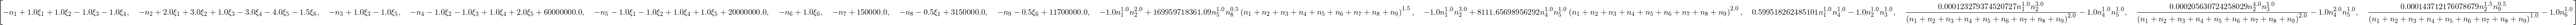

In [241]:
f.flatten().tolist()[0]

In [172]:
np.concatenate([ni,xij]).flatten().tolist()[0]

In [169]:
x0.flatten().tolist()

[14202548.2,
 59492791.2,
 5796928.19,
 40503595.4,
 523.617379,
 1710.78758,
 150000.0,
 1.39205618e-07,
 11699144.6,
 6300000.0,
 13699525.7,
 5796928.17,
 49.3109704,
 -0.0227003477,
 1710.78758]

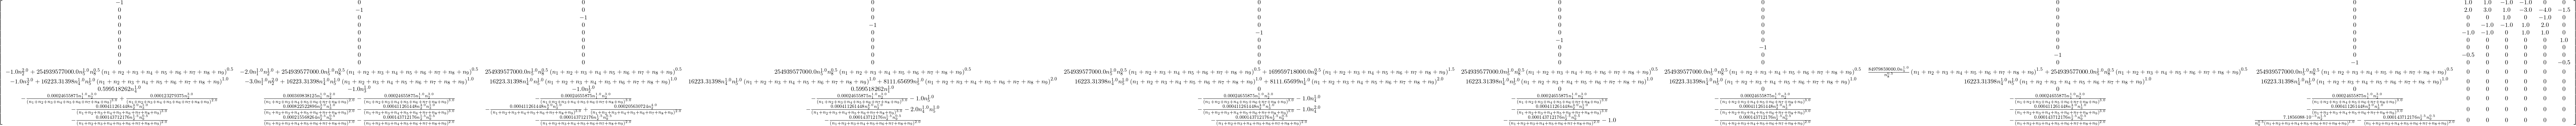

In [173]:
Matrix(f).jacobian(Matrix(np.concatenate([ni,xij])))

In [231]:
[(x,x0[i]) for i,x in enumerate(np.concatenate([ni,xij]).flatten().tolist()[0])]

In [242]:
[x.subs([(x,x0[i]) for i,x in enumerate(np.concatenate([ni,xij]).flatten().tolist()[0])]) for x in f.flatten().tolist()[0]]

In [239]:
f[0].item().subs([(x,x0[i]) for i,x in enumerate(np.concatenate([ni,xij]).flatten().tolist()[0])])

In [235]:
[(x,x0[i]) for i,x in enumerate(np.concatenate([ni,xij]).flatten().tolist()[0])]

In [243]:
f

matrix([[-n1 + 1.0*xi1 + 1.0*xi2 - 1.0*xi3 - 1.0*xi4],
        [-n2 + 2.0*xi1 + 3.0*xi2 + 1.0*xi3 - 3.0*xi4 - 4.0*xi5 - 1.5*xi6],
        [-n3 + 1.0*xi3 - 1.0*xi5],
        [-n4 - 1.0*xi2 - 1.0*xi3 + 1.0*xi4 + 2.0*xi5 + 60000000.0],
        [-n5 - 1.0*xi1 - 1.0*xi2 + 1.0*xi4 + 1.0*xi5 + 20000000.0],
        [-n6 + 1.0*xi6],
        [-n7 + 150000.0],
        [-n8 - 0.5*xi1 + 3150000.0],
        [-n9 - 0.5*xi6 + 11700000.0],
        [ -1.0*n1**1.0*n2**2.0 + 169959718361.09*n5**1.0*n8**0.5*(n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9)**1.5],
        [ -1.0*n1**1.0*n2**3.0 + 8111.65698956292*n4**1.0*n5**1.0*(n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9)**2.0],
        [0.599518262485101*n1**1.0*n4**1.0 - 1.0*n2**1.0*n3**1.0],
        [ 0.000123279374520727*n1**1.0*n2**3.0*(n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9)**(-2.0) - 1.0*n4**1.0*n5**1.0],
        [ 0.000205630724258029*n2**4.0*n3**1.0*(n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9)**(-2.0) - 1.0*n4**2.0*n5**1.0],
        [ 0.00014371217

In [265]:
import scipy
import scipy.linalg
atom_m = np.array([
    [1, 0, 1, 0, 1, 1, 0, 0, 0],
    [2, 2, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 2, 1, 0, 2],
    [0, 0, 0, 2, 0, 0, 2, 2, 0]
    ])

p, l, u = scipy.linalg.lu(atom_m[:,[0,1,2,3]])
print([p, l, u])

[array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]]), array([[ 1. ,  0. ,  0. ,  0. ],
       [ 0.5,  1. ,  0. ,  0. ],
       [ 0. , -1. ,  1. ,  0. ],
       [ 0. , -0. ,  0. ,  1. ]]), array([[ 2. ,  2. ,  1. ,  1. ],
       [ 0. , -1. ,  0.5, -0.5],
       [ 0. ,  0. ,  0.5, -0.5],
       [ 0. ,  0. ,  0. ,  2. ]])]


In [276]:
ToReducedRowEchelonForm(atom_m)

C:\Users\Public\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Public\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


ValueError: cannot convert float NaN to integer

In [279]:
atom_m[0]

array([1, 0, 1, 0, 1, 1, 0, 0, 0])

In [275]:
def ToReducedRowEchelonForm( mat):
    M = np.copy(mat)
    lead = 0
    rowCount = len(M)
    columnCount = len(M[0])
    for r in range(rowCount):
        if lead >= columnCount:
            return
        i = r
        while M[i][lead] == 0:
            i += 1
            if i == rowCount:
                i = r
                lead += 1
                if columnCount == lead:
                    return
        M[i],M[r] = M[r],M[i]
        lv = M[r][lead]
        M[r] = [ mrx / float(lv) for mrx in M[r]]
        for i in range(rowCount):
            if i != r:
                lv = M[i][lead]
                M[i] = [ iv - lv*rv for rv,iv in zip(M[r],M[i])]
        lead += 1
    return M